In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from scipy.optimize import curve_fit
%matplotlib inline

In [18]:
plt.rc('font', family='Comic Sans MS')
snela = pd.read_csv("Sznela.csv", sep=',\t',engine='python')
malus = pd.read_csv("Malus.csv", sep=',\t',engine='python')
bryś = 56.25
granica_Nalkowskiej = 44
malus

,tetha,I_z[mA],|z|[mA]
0,0,0.9000,1.000
1,15,0.8200,1.000
2,30,0.6200,1.000
3,45,0.4000,1.000
4,60,0.1800,0.300
5,75,0.0430,0.100
6,90,0.0014,0.003


In [31]:
sznela = np.zeros((8,8))
sznela[0] = snela['alpha']
sznela[1] = snela['beta']
delta_kat = np.sqrt(1+0.5**2)
sznela[2] = delta_kat
sznela[3] = delta_kat
sznela[4] = np.sin(sznela[0]/180*np.pi)
sznela[5] = np.sin(sznela[1]/180*np.pi)
sznela[6] = delta_kat*np.cos(sznela[0]/180*np.pi)*np.pi/180
sznela[7] = delta_kat*np.cos(sznela[1]/180*np.pi)*np.pi/180
print(pd.DataFrame.from_records(sznela.T).to_latex(float_format="%.4f"))

\begin{tabular}{lrrrrrrrr}
\toprule
{} &    0 &    1 &     2 &     3 &      4 &      5 &      6 &      7 \\
\midrule
0 & 10.0 &  6.0 & 1.118 & 1.118 & 0.1736 & 0.1045 & 0.0192 & 0.0194 \\
1 & 20.0 & 13.0 & 1.118 & 1.118 & 0.3420 & 0.2250 & 0.0183 & 0.0190 \\
2 & 30.0 & 19.5 & 1.118 & 1.118 & 0.5000 & 0.3338 & 0.0169 & 0.0184 \\
3 & 40.0 & 25.0 & 1.118 & 1.118 & 0.6428 & 0.4226 & 0.0149 & 0.0177 \\
4 & 50.0 & 31.0 & 1.118 & 1.118 & 0.7660 & 0.5150 & 0.0125 & 0.0167 \\
5 & 60.0 & 35.0 & 1.118 & 1.118 & 0.8660 & 0.5736 & 0.0098 & 0.0160 \\
6 & 70.0 & 38.5 & 1.118 & 1.118 & 0.9397 & 0.6225 & 0.0067 & 0.0153 \\
7 & 80.0 & 40.0 & 1.118 & 1.118 & 0.9848 & 0.6428 & 0.0034 & 0.0149 \\
\bottomrule
\end{tabular}



In [42]:
maluski = np.zeros((5,7))
maluski[0] = malus['tetha']
maluski[1] = delta_kat
maluski[2] = malus['I_z[mA]']
maluski[3] = malus['|z|[mA]']
maluski[4] = malus['|z|[mA]']*0.025
print(pd.DataFrame.from_records(maluski.T).to_latex(float_format="%.7f"))

\begin{tabular}{lrrrrr}
\toprule
{} &    0 &        1 &      2 &     3 &        4 \\
\midrule
0 &  0.0 & 1.118034 & 0.9000 & 1.000 & 0.025000 \\
1 & 15.0 & 1.118034 & 0.8200 & 1.000 & 0.025000 \\
2 & 30.0 & 1.118034 & 0.6200 & 1.000 & 0.025000 \\
3 & 45.0 & 1.118034 & 0.4000 & 1.000 & 0.025000 \\
4 & 60.0 & 1.118034 & 0.1800 & 0.300 & 0.007500 \\
5 & 75.0 & 1.118034 & 0.0430 & 0.100 & 0.002500 \\
6 & 90.0 & 1.118034 & 0.0014 & 0.003 & 0.000075 \\
\bottomrule
\end{tabular}



In [83]:
def prosta(x,a):
    return a*x

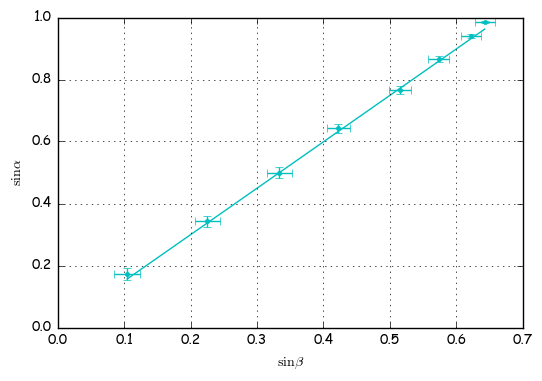

In [88]:
plt.errorbar(sznela[5],sznela[4],sznela[6],sznela[7],'c.')
prosty_snell, wariujacy_snell = np.polyfit(sznela[5],sznela[4],1,cov=True)
nowy_snell, nowy_niepewny_snell = curve_fit(prosta,sznela[5],sznela[4])
plt.plot(sznela[5],sznela[5]*prosty_snell[0],'c')
plt.xlabel(r'$\sin{\beta}$'); plt.ylabel(r'$\sin{\alpha}$'); plt.grid()
plt.ylim(0,1)
plt.savefig('snella.png')

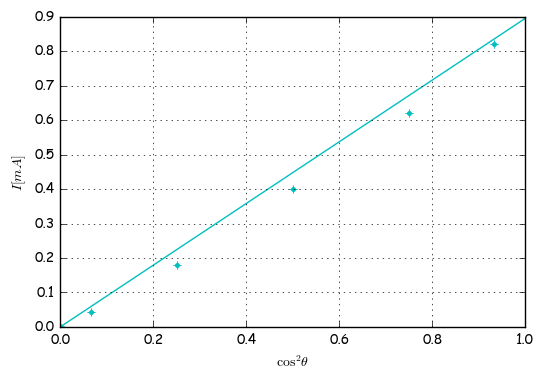

In [82]:
plt.errorbar(np.cos(maluski[0]*np.pi/180)**2,maluski[2],0,0,'c.')
plt.xlabel(r'$\cos^2{\theta}$'); plt.ylabel(r'$I[mA]$'); plt.grid()
prosty_malus, wariujacy_malus = np.polyfit(np.cos(maluski[0]*np.pi/180)**2,maluski[2],1,cov=True)
plt.plot(np.cos(maluski[0]*np.pi/180)**2,np.cos(maluski[0]*np.pi/180)**2*prosty_malus[0],'c')
plt.savefig('malus.png')

In [89]:
n_snela = prosty_snell[0]
print("Ze snella",n_snela, "+/-",np.sqrt(wariujacy_snell[0,0]))
n_gran = 1/np.sin(granica_Nalkowskiej*np.pi/180)
print("Z granicznego",n_gran,"+/-",delta_kat*np.cos(granica_Nalkowskiej*np.pi/180)*n_gran**2)

Ze snella 1.49762231789 +/- 0.0223720234412
Z granicznego 1.43955653963 +/- 1.66665822573
Nowy snell [ 1.5132488] +/- [[ 0.00707874]]
